In [1]:
import fanc
import fanc.plotting as fancplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import re

%matplotlib inline

In /fast/AG_Lupianez/rdoming/anaconda3/envs/hic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /fast/AG_Lupianez/rdoming/anaconda3/envs/hic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /fast/AG_Lupianez/rdoming/anaconda3/envs/hic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /fast/AG_Lupianez/rdoming/anaconda3/envs/hic/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be remove

In [5]:
def plotHic(hic,coords,perc=97.5):
    vmax = np.percentile(hic.matrix((coords,coords)).flatten(),perc)
    hicplot = fancplot.TriangularMatrixPlot(hic,vmax=vmax)
    return(hicplot)

In [27]:
HiC_mESC = fanc.load("../data/bonev/HiC/ES_mapq30/ES_mapq30.hic@25000@KR")
#hicPlot = plotHic(HiC_mESC)

In [9]:


##Insulation score plot
windowSize = 250000
insulationFilename = "2-CTCF-insulation/Bonev_mESc_25kb_iw250kb.insulation.bg"
insulation_mESC = fanc.load(insulationFilename)
insulationPlot = fancplot.LinePlot(insulation_mESC,fill=True,aspect=0.05,style="mid",colors=["gray"],title="insulation")

##Boundaries plot
fancBoundariesSingle = "2-CTCF-insulation/FANC_boundaries_singleStrand.bed"
fancBoundariesBoth = "2-CTCF-insulation/FANC_boundaries_bothStrands.bed"
fancBoundariesPlot= fancplot.BarPlot([fancBoundariesSingle,fancBoundariesBoth],
                                     title="FANC boundaries",
                                     colors=['#432371',"#FAAE7B"],
                                     aspect=0.05)

##Ctcf plot
ctcfPlot = fancplot.LinePlot("../data/bonev/CTCF_mESC/GSE96107_ES_CTCF.bw",aspect=0.1,title="CTCF (red=+,blue=-)",colors=["gray"])

loopPlot = fancplot.GenePlot("4-NC_Loops/all_loops.bed",aspect=0.25,no_labels_outside_plot=True)

##Ctcf peaks plot
ctcfPeaksPlot_plus = fancplot.FeatureLayerPlot("2-CTCF-insulation/Bonev_mESC_CTCF+.bed",
                                               aspect=0.025,
                                               collapse=True)
ctcfPeaksPlot_minus = fancplot.FeatureLayerPlot("2-CTCF-insulation/Bonev_mESC_CTCF-.bed",
                                                aspect=0.025,
                                                collapse=True)

##Genes plot
genes = "../data/genomes/mm10.ensembl102.coding.gtf"
genePlot = fancplot.GenePlot(genes,group_by="gene_id",squash=True,aspect=0.25,show_arrows=False,no_labels_outside_plot=True)

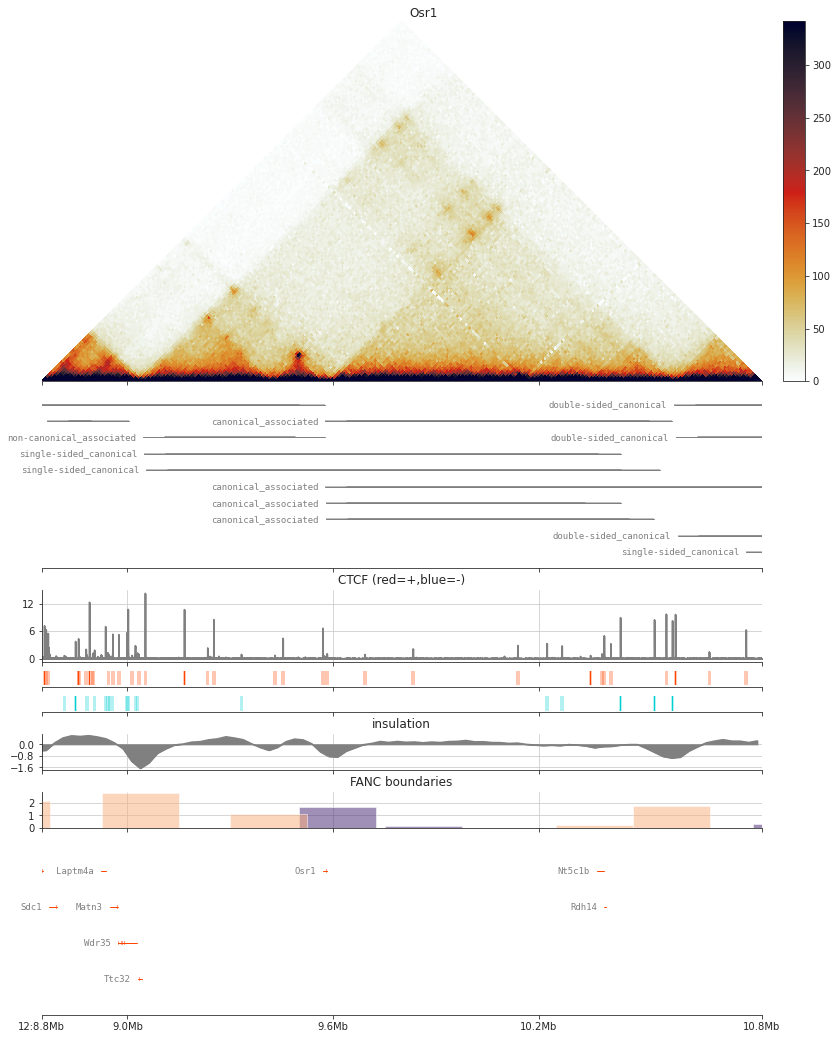

In [6]:
coords = "12:8750000-10850000"
hicPlot = plotHic(HiC_mESC,coords)
gf = fancplot.GenomicFigure([hicPlot,
                             loopPlot,
                             ctcfPlot,
                             ctcfPeaksPlot_plus,
                             ctcfPeaksPlot_minus,
                             insulationPlot,
                             fancBoundariesPlot,
                             genePlot],
                            width=10,
                            ticks_last=True)

gf.plot(coords) 
plt.suptitle("Osr1")
plt.savefig("figurePlots/Osr1.pdf")

In [8]:
chrom = 15 
anchorCoord = 56065000
coords = "{}:{}-{}".format(chrom,anchorCoord-500000,anchorCoord+1000000)

hicPlot = plotHic(HiC_mESC,coords,perc=95)
gf = fancplot.GenomicFigure([hicPlot,
                             loopPlot,
                             ctcfPlot,
                             ctcfPeaksPlot_plus,
                             ctcfPeaksPlot_minus,
                             insulationPlot,
                             fancBoundariesPlot,
                             genePlot],
                            width=10,
                            ticks_last=True)

gf.plot(coords) 
plt.suptitle("Has2")
plt.savefig("figurePlots/Has2.pdf")

In [10]:
chrom = 11
anchorCoord = 45010000

coords = "{}:{}-{}".format(chrom,anchorCoord-1000000,anchorCoord+1000000)

hicPlot = plotHic(HiC_mESC,coords)
gf = fancplot.GenomicFigure([hicPlot,
                             loopPlot,
                             ctcfPlot,
                             ctcfPeaksPlot_plus,
                             ctcfPeaksPlot_minus,
                             insulationPlot,
                             fancBoundariesPlot,
                             genePlot],
                            width=10,
                            ticks_last=True)

gf.plot(coords) 
plt.suptitle("Ebf1")
plt.savefig("figurePlots/Ebf1.pdf")
